In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [88]:
df1=pd.read_csv('/content/US Police shootings in from 2015-22.csv')

In [89]:
df1.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'longitude', 'latitude', 'is_geocoding_exact'],
      dtype='object')

In [90]:
df1.head(10)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,1,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,2,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,3,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,4,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,5,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True
5,6,Kenneth Joe Brown,2015-01-04,shot,gun,18.0,M,W,Guthrie,OK,False,attack,Not fleeing,False,-97.423,35.877,True
6,7,Kenneth Arnold Buck,2015-01-05,shot,gun,22.0,M,H,Chandler,AZ,False,attack,Car,False,-111.841,33.328,True
7,8,Brock Nichols,2015-01-06,shot,gun,35.0,M,W,Assaria,KS,False,attack,Not fleeing,False,-97.564,38.704,True
8,9,Autumn Steele,2015-01-06,shot,unarmed,34.0,F,W,Burlington,IA,False,other,Not fleeing,True,-91.119,40.809,True
9,10,Leslie Sapp III,2015-01-06,shot,toy weapon,47.0,M,B,Knoxville,PA,False,attack,Not fleeing,False,-79.991,40.413,True


In [91]:
df1.count()

id                         7682
name                       7275
date                       7682
manner_of_death            7682
armed                      7473
age                        7210
gender                     7663
race                       6244
city                       7682
state                      7682
signs_of_mental_illness    7682
threat_level               7682
flee                       6819
body_camera                7682
longitude                  6847
latitude                   6847
is_geocoding_exact         7682
dtype: int64

In [92]:
df1.isnull().sum()

id                            0
name                        407
date                          0
manner_of_death               0
armed                       209
age                         472
gender                       19
race                       1438
city                          0
state                         0
signs_of_mental_illness       0
threat_level                  0
flee                        863
body_camera                   0
longitude                   835
latitude                    835
is_geocoding_exact            0
dtype: int64

In [93]:
#since the names are null and we just can't give some random values for unknown names, so I'll just assign Unknown name
df1['name'] = df1['name'].fillna('Unknown')

In [94]:
df1['name'].isnull().sum()

0

In [95]:
df1['armed'].nunique()

103

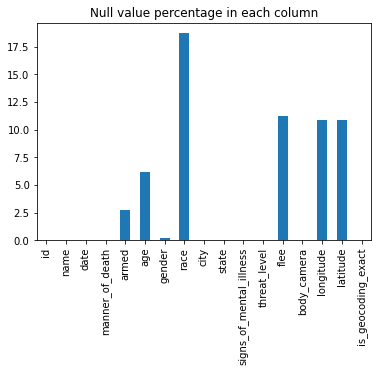

In [96]:
nullPercentage = df1.isnull().sum()/df1.shape[0]*100
nullPercentage.plot(kind='bar')
plt.title("Null value percentage in each column")
plt.show()

In [97]:
df1['race'].nunique()

6

In [98]:
df1['race'] = df1['race'].fillna(df1['race'].mode()[0])

In [99]:
df1['city'].mode()

0    Los Angeles
dtype: object

In [100]:
df1['city'].nunique()

3142

In [101]:
df1.duplicated().sum()

0

In [102]:
df1['state'].nunique()

51

In [103]:
#taking 2 fields so that I can use -count() on it
stateAndDate = df1[['date','state']]
stateList = [i for i in stateAndDate['state']]

In [104]:
stateCounts = []
for state in df1['state'].unique():
    stateCounts.append([stateList.count(state),state])
print(stateCounts)

[[208, 'WA'], [125, 'OR'], [71, 'KS'], [1110, 'CA'], [278, 'CO'], [211, 'OK'], [349, 'AZ'], [47, 'IA'], [159, 'PA'], [690, 'TX'], [219, 'OH'], [154, 'LA'], [48, 'MT'], [88, 'UT'], [109, 'AR'], [155, 'IL'], [124, 'NV'], [165, 'NM'], [86, 'MN'], [198, 'MO'], [134, 'VA'], [87, 'NJ'], [140, 'IN'], [141, 'KY'], [54, 'MA'], [22, 'NH'], [493, 'FL'], [62, 'ID'], [107, 'MD'], [38, 'NE'], [129, 'MI'], [289, 'GA'], [208, 'TN'], [218, 'NC'], [52, 'AK'], [140, 'NY'], [33, 'ME'], [145, 'AL'], [98, 'MS'], [115, 'WI'], [124, 'SC'], [17, 'DE'], [24, 'DC'], [71, 'WV'], [37, 'HI'], [25, 'WY'], [18, 'ND'], [22, 'CT'], [27, 'SD'], [12, 'VT'], [6, 'RI']]


In [105]:
stateCounts.sort(reverse=True)

In [106]:
print(stateCounts)

[[1110, 'CA'], [690, 'TX'], [493, 'FL'], [349, 'AZ'], [289, 'GA'], [278, 'CO'], [219, 'OH'], [218, 'NC'], [211, 'OK'], [208, 'WA'], [208, 'TN'], [198, 'MO'], [165, 'NM'], [159, 'PA'], [155, 'IL'], [154, 'LA'], [145, 'AL'], [141, 'KY'], [140, 'NY'], [140, 'IN'], [134, 'VA'], [129, 'MI'], [125, 'OR'], [124, 'SC'], [124, 'NV'], [115, 'WI'], [109, 'AR'], [107, 'MD'], [98, 'MS'], [88, 'UT'], [87, 'NJ'], [86, 'MN'], [71, 'WV'], [71, 'KS'], [62, 'ID'], [54, 'MA'], [52, 'AK'], [48, 'MT'], [47, 'IA'], [38, 'NE'], [37, 'HI'], [33, 'ME'], [27, 'SD'], [25, 'WY'], [24, 'DC'], [22, 'NH'], [22, 'CT'], [18, 'ND'], [17, 'DE'], [12, 'VT'], [6, 'RI']]


**It can be noted that more number of incidents happen in California.**